<a href="https://colab.research.google.com/github/Brycexxx/fastai/blob/master/sheep_VS_alpaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import torch

In [0]:
torch.cuda.get_device_name(0)

'GeForce MX150'

In [0]:
path = Path('datasets/')

In [0]:
path.mkdir(parents=True, exist_ok=True)

In [0]:
folder0 = 'sheep'
folder1 = 'alpaca'

In [0]:
dest0 = path / folder0
dest1 = path / folder1

In [0]:
dest0.mkdir(parents=True, exist_ok=True)
dest1.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[WindowsPath('datasets/alpaca'),
 WindowsPath('datasets/alpaca.tar.gz'),
 WindowsPath('datasets/models'),
 WindowsPath('datasets/sheep'),
 WindowsPath('datasets/sheep.tar.gz'),
 WindowsPath('datasets/urls_black.txt'),
 WindowsPath('datasets/urls_grizzly.txt'),
 WindowsPath('datasets/urls_teddys.txt')]

In [0]:
classes = ['sheep', 'alpaca']

In [0]:
help(verify_images)

Help on function verify_images in module fastai.vision.data:

verify_images(path:Union[pathlib.Path, str], delete:bool=True, max_workers:int=4, max_size:int=None, dest:Union[pathlib.Path, str]='.', n_channels:int=3, interp=2, ext:str=None, img_format:str=None, resume:bool=None, **kwargs)
    Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.



In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True)

sheep


alpaca


In [0]:
doc(ImageDataBunch.from_folder)

In [0]:
np.random.seed(32)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=8).normalize(imagenet_stats)

In [0]:
data.classes

['alpaca', 'sheep']

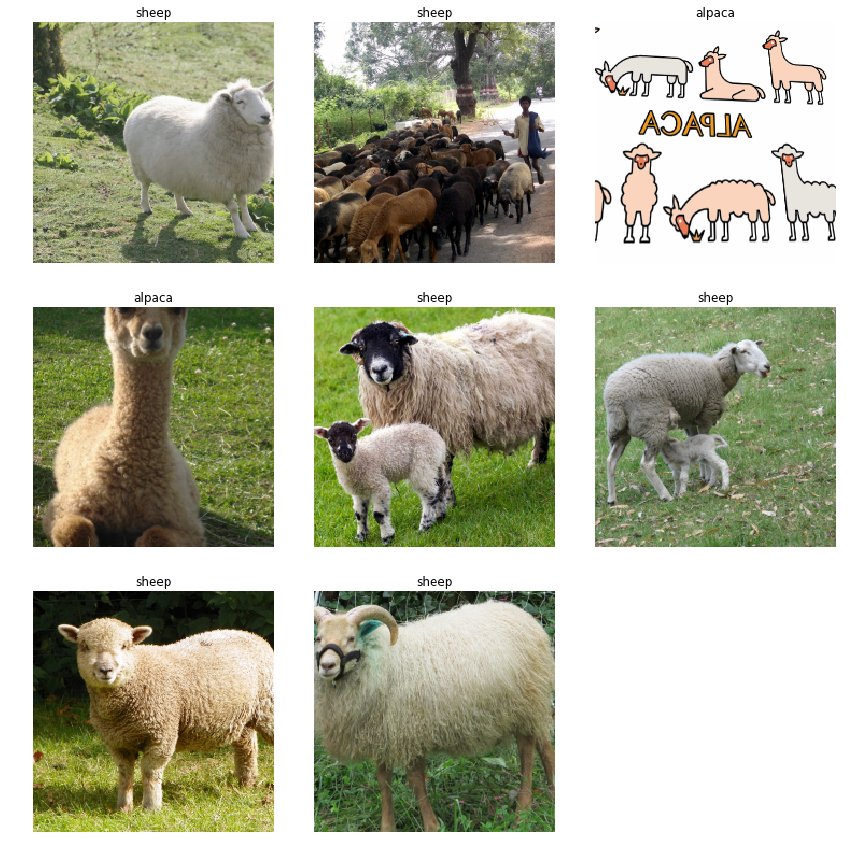

In [0]:
data.show_batch(rows=3)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alpaca', 'sheep'], 2, 922, 230)

In [0]:
learner = create_cnn(data, models.resnet34, metrics=accuracy)

In [0]:
learner.fit_one_cycle(6)

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

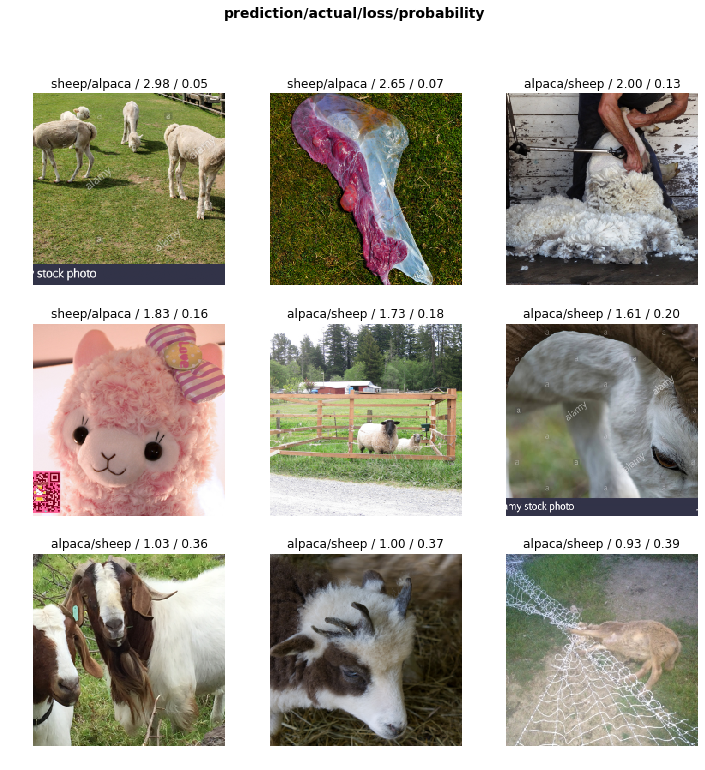

In [0]:
interp.plot_top_losses(9)

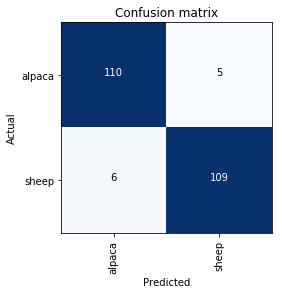

In [0]:
interp.plot_confusion_matrix()

In [0]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


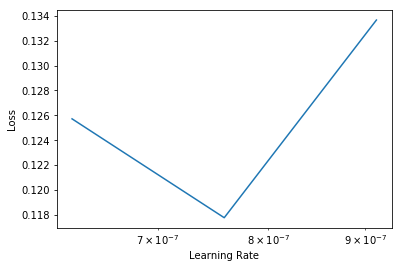

In [0]:
learner.recorder.plot()

In [0]:
learner.unfreeze()
learner.fit_one_cycle(3, max_lr=slice(6e-7, 7.5e-7))

In [0]:
from fastai.widgets import *

In [0]:
ds, idx = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idx, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
ds, idx = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Train)

In [0]:
ImageCleaner(ds, idx, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alpaca', 'sheep'], 2, 922, 230)

In [0]:
doc(ImageItemList)

In [0]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [0]:
np.random.seed(42)
db = (ImageItemList.from_df(df, path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=16))

In [0]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['alpaca', 'sheep'], 2, 705, 176)

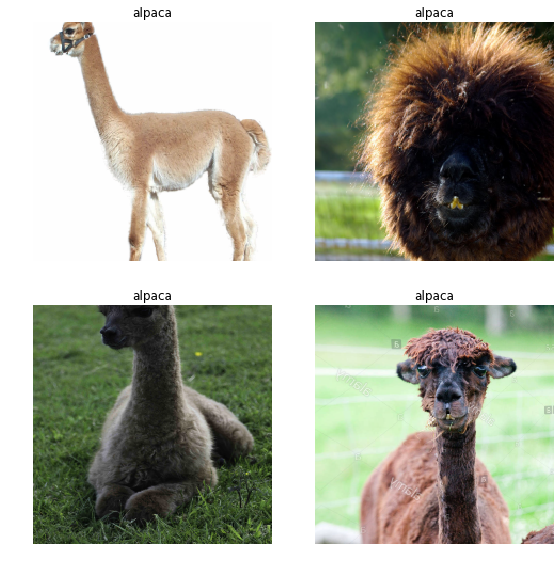

In [0]:
db.show_batch(rows=2)

In [0]:
learner_cleaned = create_cnn(db, models.resnet34, metrics=accuracy)

In [0]:
learner_cleaned.fit_one_cycle(8)

In [0]:
interp = ClassificationInterpretation.from_learner(learner_cleaned)

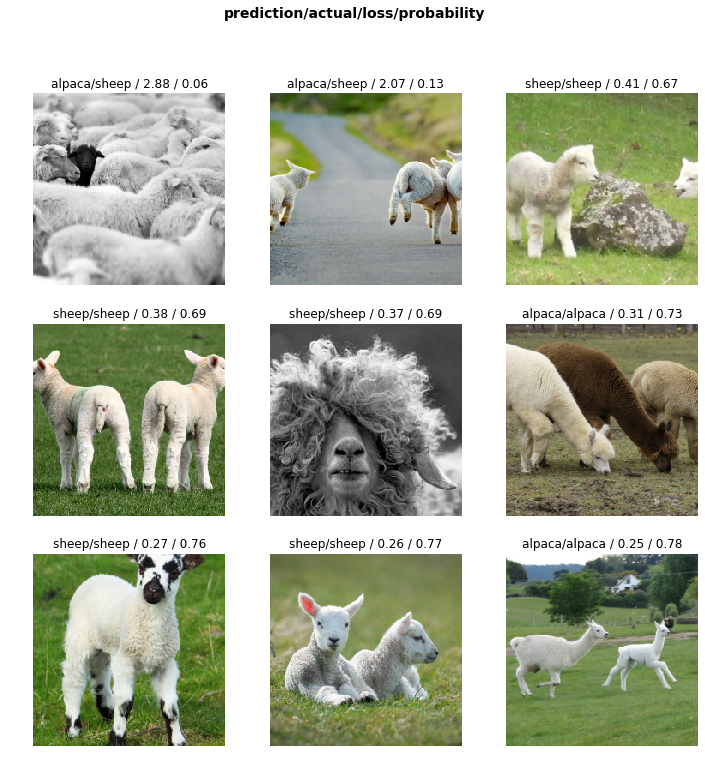

In [0]:
interp.plot_top_losses(9)

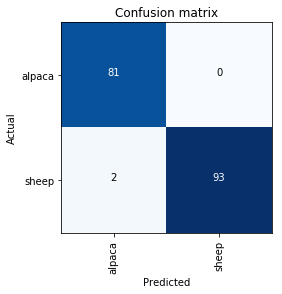

In [0]:
interp.plot_confusion_matrix()

In [0]:
learner_cleaned.save('stage-1')

In [0]:
learner_cleaned.load('stage-1')
learner_cleaned.unfreeze()
learner_cleaned.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


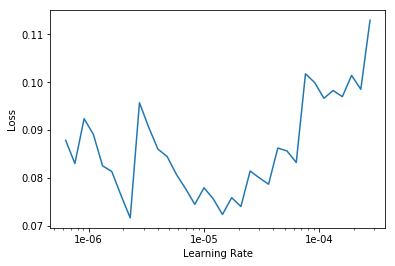

In [0]:
learner_cleaned.recorder.plot()

In [0]:
learner_cleaned.load('stage-1')
learner_cleaned.unfreeze()
learner_cleaned.fit_one_cycle(2, max_lr=slice(2e-6, 1e-5))

In [0]:
learner_cleaned.save('stage-2')

In [0]:
ds, idx = DatasetFormatter().from_toplosses(learner_cleaned, ds_type=DatasetType.Valid)
ImageCleaner(ds, idx, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
ds, idx = DatasetFormatter().from_toplosses(learner_cleaned, ds_type=DatasetType.Train)
ImageCleaner(ds, idx, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
learner_cleaned.export()

In [0]:
defaults.device = torch.device('cpu')

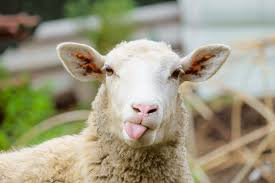

In [0]:
img = open_image(path / 'tt.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category sheep